In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

scores = 0.9267
estimator weights / errors = [[1.68128804 0.15333333]
 [1.5297804  0.18358375]
 [1.12005455 0.28762831]
 [1.27912687 0.24339109]
 [1.17623218 0.27146855]
 [1.22986877 0.25658238]
 [1.0477733  0.30924063]
 [1.09866331 0.29393019]
 [1.17230892 0.27257842]
 [1.18948657 0.26773999]
 [0.97284239 0.33256034]
 [0.94517343 0.34139123]
 [0.83503602 0.37759674]
 [0.90913559 0.35305945]
 [0.82715744 0.38024551]
 [0.8750084  0.36427319]
 [0.83867242 0.37637663]
 [0.83667663 0.37704608]
 [0.81345853 0.38486801]
 [0.8244594  0.38115424]]


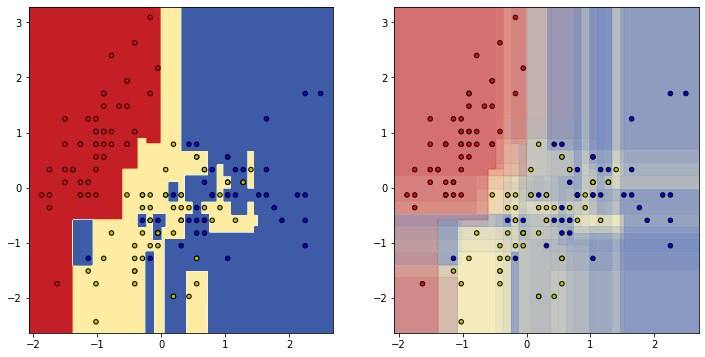

In [2]:
pair = [0, 1]
RANDOM_SEED = 13
plot_step = 0.02

# load iris dataset
iris = load_iris()

X_train = iris.data[:, pair]
y_train = iris.target

# Shuffle
idx = np.arange(X_train.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X_train = X_train[idx]
y_train = y_train[idx]

# Standardize
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

# Train and score
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=20, algorithm="SAMME", learning_rate=0.7)
model.fit(X_train, y_train)
scores = model.score(X_train, y_train)
print('scores = %.4f' % scores)
print('estimator weights / errors = %s' % np.c_[model.estimator_weights_, model.estimator_errors_])

# Plot
plt.figure(figsize=(6 * 2, 6))

x_min = X_train[:, 0].min() - .2
x_max = X_train[:, 0].max() + .2
y_min = X_train[:, 1].min() - .2
y_max = X_train[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

plt.subplot(1, 2, 1)
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)

plt.subplot(1, 2, 2)
estimator_alpha = 1. / len(model.estimators_)
for tree in model.estimators_:
    z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, alpha=estimator_alpha, cmap=plt.cm.RdYlBu)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)

plt.show()